# Aviation Risk Analysis for Aircraft Acquisition

## Introduction
As our company explores the opportunity to diversify into the aviation industry, this project aims to identify aircraft types with the lowest risk based on historical accident data. Using aviation incident records from 1962 to 2023, our goal is to deliver data-driven insights to guide aircraft purchasing decisions.

## Business Quesstions Im tryinng to answer and Explore in EDA

1. Which aircraft makes/models are most often involved in fatal accidents?
2. Which phases of flight have the highest fatality or damage rates?
3. Does weather condition impact injury severity or accident frequency?
4. Which purposes of flight have more severe outcomes (e.g., personal vs. commercial)?
5. Have fatal accidents decreased over the decades?
6. What is the correlation between aircraft features (like engine count) and accident severity?

These questions will guide our analysis and inform actionable recommendations for aircraft acquisition.

### Stakeholder
The Head of the Aviation Division will use this analysis to decide which aircraft to consider acquiring for safe and reliable operations. Our recommendations aim to reduce operational risks and ensure strong entry into the aviation market.

## Data Understanding

The dataset comes from the [National Transportation Safety Board (NTSB)], which provides data on civil aviation accidents and selected incidents from 1962 to 2023. It includes details such as:

- Event Date & Location
- Aircraft Make/Model
- Flight Purpose (Personal, Commercial, etc.)
- Injury Severity
- Phase of Flight (Takeoff, Landing, etc.)
- Weather Conditions
- Aircraft Damage
- Narrative Descriptions

This dataset is relevant because it allows us to analyze patterns of risk associated with different aircraft types, operational environments, and usage conditions. 

### Dataset Summary (To be filled after loading the data):
- Number of rows: 
- Number of columns: 
- Features of interest: Aircraft Model, Injury Severity, Phase of Flight, Weather, Aircraft Damage

### Coded Fields
Some fields are encoded using abbreviations (e.g., `INJURY_SEVERITY` might contain values like 'FAT' for Fatal, 'MIN' for Minor). These need to be decoded for clarity before meaningful analysis.

A decoding step will be done as part of data preparation, and a dictionary of decoded values will be maintained to enhance interpretability.

### Limitations:
- Many rows have missing values
- Some fields are in free-text (e.g., narratives)
- International accidents might be inconsistently reported
- Some variables require decoding to be useful for analysis

## Data Preparation

In this section, we will load the raw aviation accident dataset and perform initial data cleaning and preparation to make it suitable for analysis.

### Steps:

1. Load the dataset: Import the aviation dataset using pandas.
2. Preview the data: Display the first few rows to get a sense of its structure and values.
3. Understand column types and names: Identify useful features for analysis.
4. Check for missing values: Determine where imputation or exclusion might be needed.
5. Identify coded or unclear values: Pinpoint fields that use abbreviations or codes and create a decoding strategy.
6. Rename columns (if needed): Make column names more readable and descriptive.
7. Drop or fill irrelevant or incomplete data: Depending on the relevance of columns or percentage of missing values.
8. Check for duplicates

This preparation phase is crucial for cleaning the data and making sure it's usable for generating actionable insights.

In [27]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset and encode
file_path = 'C:/Users/LENOVO/Documents/Moringa-2025/Phase 1/aviation-accidents-analysis/data/AviationData.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 3: Preview the first few rows
df.head()

C:\Users\LENOVO\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Feature Selection and Decoding Strategy

We will focus on the following key features to understand risk patterns associated with different aircraft:

- Aircraft Make and Model: To identify which aircraft are associated with fewer or more severe accidents.
- Injury Severity & Damage: To measure accident outcomes.
- Weather Condition: To understand external risk contributors.
- Purpose of Flight: To segment commercial vs. personal flights.
- Flight Phase: To see which phases are riskier (e.g., takeoff vs. landing).
- Engine Type & Count: May affect accident outcomes.
- Country/Location: Regional trends or risks.

We will decode columns such as `Injury.Severity`, `Aircraft.damage`, `Weather.Condition`, and `Purpose.of.flight` to make values human-readable and usable in visualizations.

Irrelevant or redundant columns such as IDs, exact coordinates, and airport names will be dropped from the working dataset.

In [28]:
# Decoding dictionaries 
injury_severity_map = {'Fatal': 'Fatal','Non-Fatal': 'Non-Fatal','Incident': 'Incident','Accident': 'Accident','Unavailable': 'Unknown','Serious': 'Serious'}
aircraft_damage_map = {'Destroyed': 'Destroyed','Substantial': 'Substantial','Minor': 'Minor','Unknown': 'Unknown','None': 'None'}

weather_condition_map = {'VMC': 'Visual Meteorological Conditions','IMC': 'Instrument Meteorological Conditions','UNK': 'Unknown'}

# You can update this further based on your data
flight_phase_map = {'Takeoff': 'Takeoff','Landing': 'Landing','Cruise': 'Cruise','Approach': 'Approach','Taxi': 'Taxi','Climb': 'Climb','Descent': 'Descent','Standing': 'Standing','Unknown': 'Unknown'}

purpose_map = {'Personal': 'Personal','Business': 'Business','Instructional': 'Training','Public Use': 'Government','Positioning': 'Relocation','Aerial Application': 'Agriculture','Other': 'Other'}

# Apply decoding
df['Injury.Severity'] = df['Injury.Severity'].map(injury_severity_map).fillna('Other')
df['Aircraft.damage'] = df['Aircraft.damage'].map(aircraft_damage_map).fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].map(weather_condition_map).fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].map(flight_phase_map).fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].map(purpose_map).fillna('Other')

# Preview updated columns
df[['Injury.Severity', 'Aircraft.damage', 'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight']].head()

,Injury.Severity,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight
0,Other,Destroyed,Unknown,Cruise,Personal
1,Other,Destroyed,Unknown,Unknown,Personal
2,Other,Destroyed,Instrument Meteorological Conditions,Cruise,Personal
3,Other,Destroyed,Instrument Meteorological Conditions,Cruise,Personal
4,Other,Destroyed,Visual Meteorological Conditions,Approach,Personal


In [40]:
print(df.columns.tolist())

['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']


In [41]:
# Drop irrelevant columns
cols_to_drop = ['Event.Id', 'Accident.Number', 'Registration.Number','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name','Air.carrier', 'Schedule', 'FAR.Description','Report.Status', 'Publication.Date']

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [42]:
# Check % of missing values
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent

Country                   0.254250
Amateur.Built             0.114750
Model                     0.103500
Make                      0.070875
Location                  0.058500
Weather.Condition         0.000000
Event.Date                0.000000
Injury.Severity           0.000000
Aircraft.damage           0.000000
Broad.phase.of.flight     0.000000
Number.of.Engines         0.000000
Engine.Type               0.000000
Purpose.of.flight         0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Investigation.Type        0.000000
dtype: float64

In [43]:
df.isnull().sum().sort_values(ascending=False)

Country                   226
Amateur.Built             102
Model                      92
Make                       63
Location                   52
Weather.Condition           0
Event.Date                  0
Injury.Severity             0
Aircraft.damage             0
Broad.phase.of.flight       0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Investigation.Type          0
dtype: int64

In [45]:
# Impute remaining missing values with appropriate defaults
df['Country'] = df['Country'].fillna('Unknown')
df['Amateur.Built'] = df['Amateur.Built'].fillna('No')
df['Model'] = df['Model'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')

In [46]:
df.isnull().sum().sum()

0

### EDA and Visualization Insights

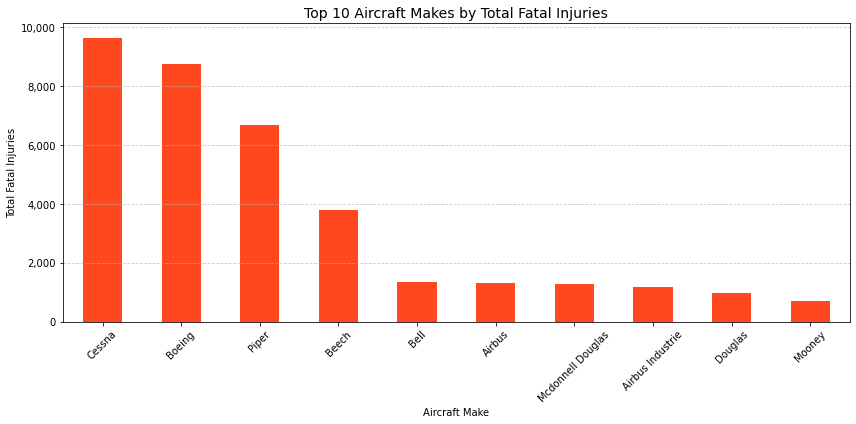

In [51]:
# Standardize aircraft make names to title case
df['Make'] = df['Make'].str.title()

#Group by aircraft make and sum fatal injuries
fatal_by_make = df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12,6))
ax = fatal_by_make.plot(kind='bar', color='#FF481D')

# Add comma separator to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Top 10 Aircraft Makes by Total Fatal Injuries', fontsize=14)
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Which phases of flight have the highest fatality or damage rates?

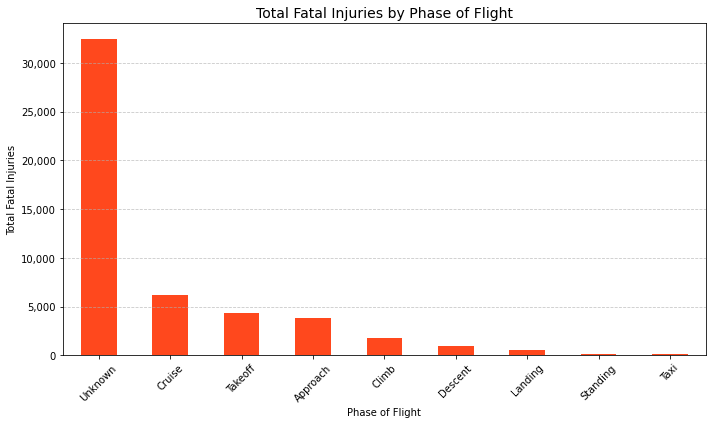

In [52]:
# Group by flight phase and sum total fatal injuries
fatal_by_phase = df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
ax = fatal_by_phase.plot(kind='bar', color='#FF481D')  # Keeping that Vermilion vibe
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total Fatal Injuries by Phase of Flight', fontsize=14)
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Accident Frequency by Phase 

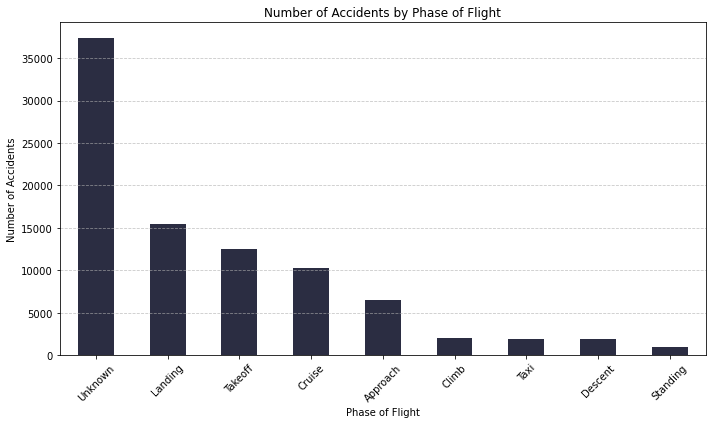

In [53]:
# Count number of accidents per flight phase
accident_count = df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(10,6))
ax = accident_count.plot(kind='bar', color='#2B2D42')
plt.title('Number of Accidents by Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Does weather condition impact injury severity or accident frequency?